In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test_set = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train_set.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test_set.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [5]:
print(f'train set shape (row, col): {train_set.shape} \n\ntest set shape (row, col): {test_set.shape}')

train set shape (row, col): (614, 13) 

test set shape (row, col): (367, 12)


In [6]:
train_set.drop('Loan_ID',axis=1,inplace=True)
test_set.drop('Loan_ID',axis=1,inplace=True)

In [7]:
train_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_set.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
train_set.isnull().any() # 614 rows but 50 rows have null values

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
train_set.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# train_set['Gender'].mode()

In [12]:
# train_set['Gender'].value_counts()

In [13]:
# Reference: https://stackoverflow.com/questions/40619445/how-to-replace-na-values-with-mode-of-a-dataframe-column-in-python

print('Before filling missing values \n\n')

for columns in['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    print(f'{columns}: {train_set[columns].value_counts()}\n','*'*30)
    train_set[columns].fillna(train_set[columns].mode()[0], inplace=True)


print('After filling missing values \n\n')

for columns in['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    print(f'{columns}: {train_set[columns].value_counts()}\n', '*'*30)


Before filling missing values 


Gender: Male      489
Female    112
Name: Gender, dtype: int64
 ******************************
Married: Yes    398
No     213
Name: Married, dtype: int64
 ******************************
Dependents: 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 ******************************
Self_Employed: No     500
Yes     82
Name: Self_Employed, dtype: int64
 ******************************
LoanAmount: 120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 ******************************
Loan_Amount_Term: 360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 ******************************
Credit_History: 1.0    475
0.0     89
Name: Credit_History, dtype: int64
 ******************************
After filling missing

In [14]:
numbers = train_set.select_dtypes('number').columns.to_list()
categorical = train_set.select_dtypes('object').columns.to_list()

numbers_df = train_set[numbers]
categorical_df = train_set[categorical]

In [15]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

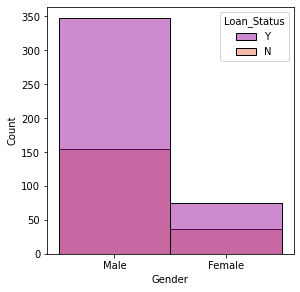

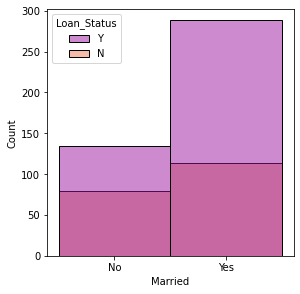

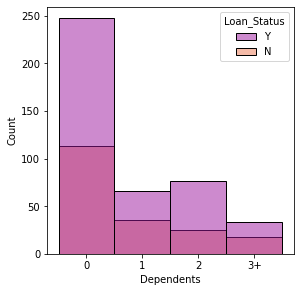

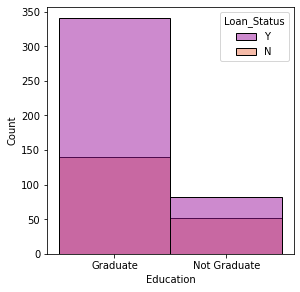

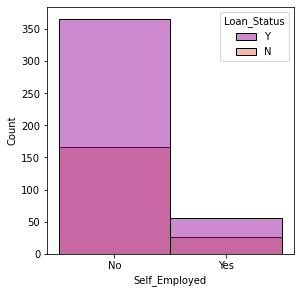

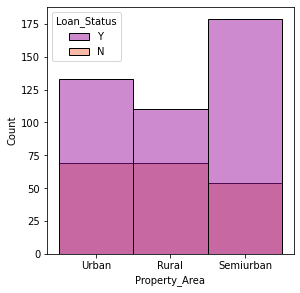

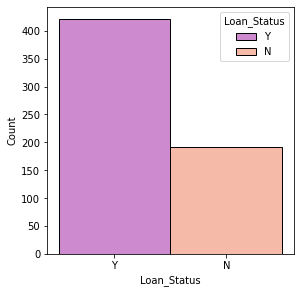

In [16]:
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html

for i in categorical:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.histplot(x=i ,hue='Loan_Status', data=train_set ,palette='plasma')

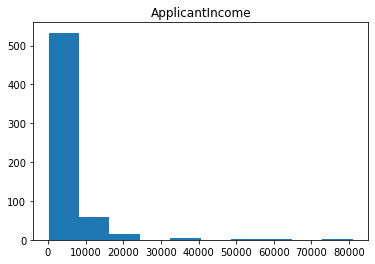

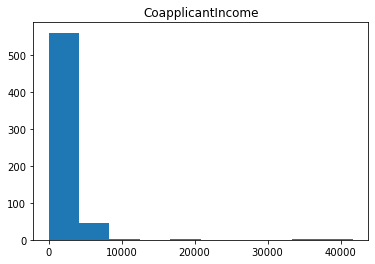

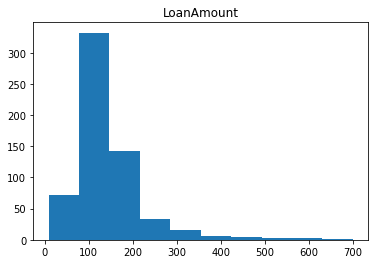

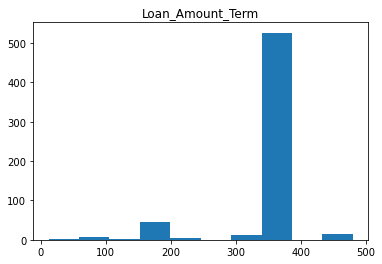

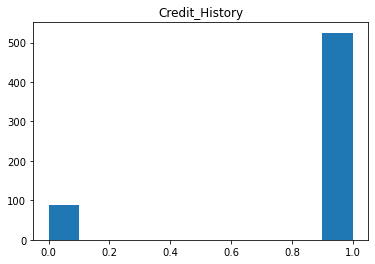

In [17]:
for i in numbers_df:
    plt.hist(numbers_df[i])
    plt.title(i)
    plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()

for col in categorical:
    train_set[col] = labels.fit_transform(train_set[col])

for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    test_set[col] = labels.fit_transform(test_set[col])


In [19]:
train_set.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [20]:
test_set.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
6,0,0,1,1,0,2226,0,59.0,360.0,1.0,1
7,1,1,2,1,0,3881,0,147.0,360.0,0.0,0
8,1,1,2,0,2,13633,0,280.0,240.0,1.0,2
9,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1


In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(6), int64(2)
memory usage: 23.1 KB


In [23]:
# Reference: https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/

corr = train_set.corr()

corr.style.background_gradient(cmap='coolwarm')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


In [24]:
# It seems that credit_history has the highest correlation with loan_status.Therefore our target value is highly dependant on this column.

<AxesSubplot:>

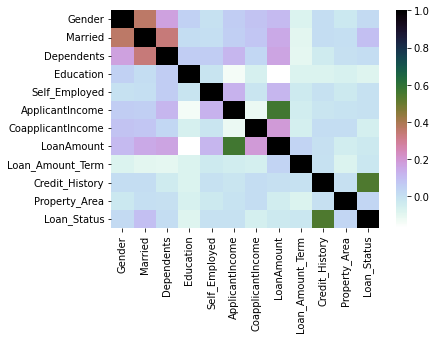

In [25]:
# Reference: https://www.kaggle.com/code/yonatanrabinovich/loan-prediction-dataset-ml-project/notebook

sns.heatmap(train_set.corr() ,cmap='cubehelix_r')

In [26]:
y = train_set['Loan_Status']
x = train_set.iloc[:,0:11]

In [27]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [28]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k = 14
knn_model = KNeighborsClassifier(n_neighbors = k).fit(train_X, train_Y)

In [29]:
yhat = knn_model.predict(test_X)

In [30]:
from sklearn import metrics

print('train set accuracy:', metrics.accuracy_score(train_Y, knn_model.predict(train_X)))
print('test set accuracy:', metrics.accuracy_score(test_Y, yhat))

train set accuracy: 0.703962703962704
test set accuracy: 0.6648648648648648


Minimum error:- 0.2756756756756757 at K = 36


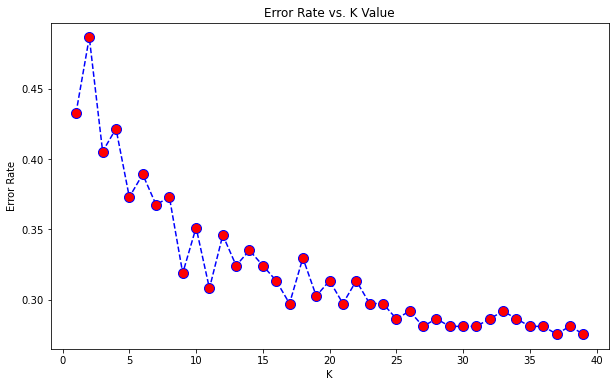

In [31]:
# Reference: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

error_rate = []
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(train_X,train_Y)
    pred_i = knn_model.predict(test_X)
    error_rate.append(np.mean(pred_i != test_Y))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [32]:
# it seems that the optimal value for k is 34

Maximum accuracy:- 0.7243243243243244 at K = 36


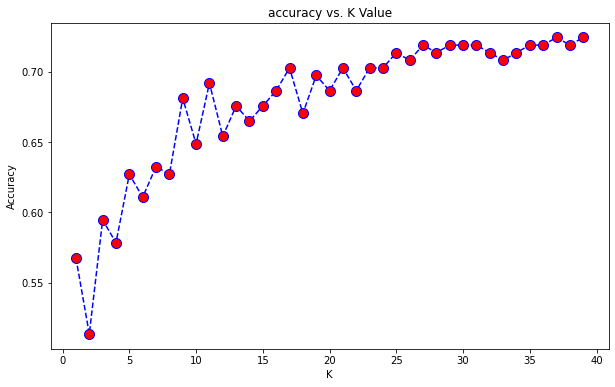

In [33]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors = i).fit(train_X,train_Y)
    yhat = knn_model.predict(test_X)
    acc.append(metrics.accuracy_score(test_Y, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [34]:
# jaccard_index

from sklearn.metrics import jaccard_score

jaccard_score(test_Y, yhat)

0.7243243243243244

In [35]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


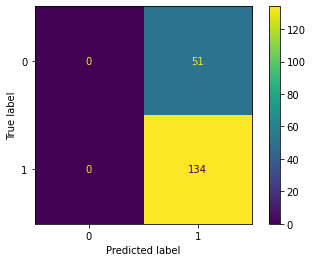

In [36]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_Y, yhat)

In [37]:
# decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 4).fit(train_X, train_Y)

In [39]:
yhat_tree = decisiontree_model.predict(test_X)

In [40]:
from sklearn import metrics

print('train set accuracy:', metrics.accuracy_score(train_Y, decisiontree_model.predict(train_X)))
print('test set accuracy:', metrics.accuracy_score(test_Y, yhat_tree))

train set accuracy: 0.8228438228438228
test set accuracy: 0.8054054054054054


In [41]:
# jaccard_index

from sklearn.metrics import jaccard_score

jaccard_score(test_Y, yhat_tree)

0.7831325301204819

In [42]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, yhat_tree))

              precision    recall  f1-score   support

           0       0.83      0.37      0.51        51
           1       0.80      0.97      0.88       134

    accuracy                           0.81       185
   macro avg       0.81      0.67      0.70       185
weighted avg       0.81      0.81      0.78       185



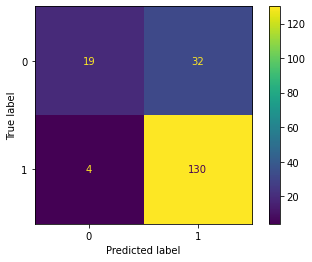

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_Y, yhat_tree)

In [44]:
# random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier().fit(train_X, train_Y)

In [46]:
yhat_forest = forest_model.predict(test_X)

In [47]:
# from sklearn import metrics

# print('train set accuracy:', metrics.accuracy_score(train_Y, forest_model.predict(train_X)))
# Sprint('test set accuracy:', metrics.accuracy_score(test_Y, yhat_forest))

train set accuracy: 1.0
test set accuracy: 0.7891891891891892


In [48]:
# jaccard_index

from sklearn.metrics import jaccard_score

jaccard_score(test_Y, yhat_forest)

0.7607361963190185

In [49]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, yhat_forest))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53        51
           1       0.81      0.93      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185



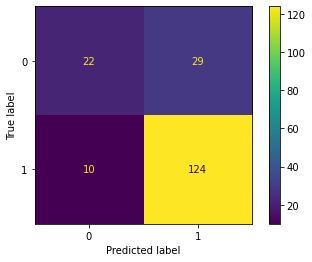

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_Y, yhat_forest)

In [51]:
# XGboost

In [58]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(train_X, train_Y)

[14:07:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [59]:
yhat_xgb = xgb_model.predict(test_X)

In [60]:
# from sklearn import metrics

# print('train set accuracy:', metrics.accuracy_score(train_Y, xgb_model.predict(train_X)))
# print('test set accuracy:', metrics.accuracy_score(test_Y, yhat_xgb))

train set accuracy: 1.0
test set accuracy: 0.7945945945945946


In [ ]:
# jaccard_index

from sklearn.metrics import jaccard_score

jaccard_score(test_Y, yhat_xgb)

In [61]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, yhat_xgb))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185



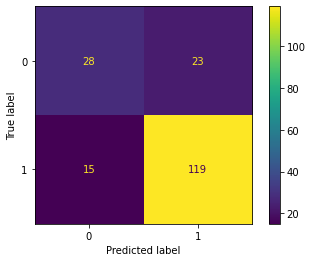

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_Y, yhat_xgb)

In [63]:
# logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.01, solver = 'liblinear').fit(train_X, train_Y)

In [65]:
yhat_lr = lr_model.predict(test_X)

In [70]:
# from sklearn import metrics

# print('train set accuracy:', metrics.accuracy_score(train_Y, lr_model.predict(train_X)))
# print('test set accuracy:', metrics.accuracy_score(test_Y, yhat_lr))

In [67]:
# jaccard_index

from sklearn.metrics import jaccard_score

jaccard_score(test_Y, yhat_lr)

0.7282608695652174

In [68]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, yhat_lr))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        51
           1       0.73      1.00      0.84       134

    accuracy                           0.73       185
   macro avg       0.86      0.51      0.44       185
weighted avg       0.80      0.73      0.62       185



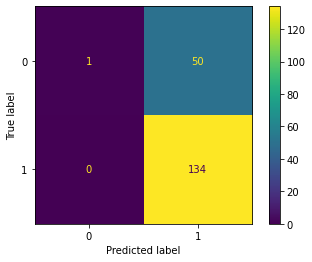

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_Y, yhat_lr)